# <font color = PUrple> UNSUPERVISED LEARNING PROJECT

##  <b> <font color = red> Part 1:

### <font color = Navy Blue> DOMAIN: Automobile

#### CONTEXT: The  data  concerns  city-cycle  fuel  consumption  in  miles  per  gallon,  to  be  predicted  in  terms  of  3  multivalued  discrete  and  5 continuous attributes

- <b> <font color = Red> DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon

#### <b> <font color = Teal> PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg

In [12]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [13]:
missing_values = ["n/a", "na","?", "--","-"]                                                                            
data = pd.read_csv (r'C:\Users\gunja\Downloads/Part1 - Car name.csv', na_values = missing_values)
print(data)

                      car_name
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
..                         ...
393            ford mustang gl
394                  vw pickup
395              dodge rampage
396                ford ranger
397                 chevy s-10

[398 rows x 1 columns]


In [7]:
data.isnull().sum()

car_name    0
dtype: int64

<b> <u><font color = teal> The dataset has been combined, on data set was in JSON and the other detail was provided in CSV hence, merged the data using pandas. 

In [8]:
import json
with open(r'C:\Users\gunja\Downloads/Part1 - Car-Attributes.json','r') as f:
    data1 = json.load(f)
df = pd.DataFrame(data1)
print(df)

      mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]


In [14]:
df.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [15]:
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [17]:
df2 = pd.concat([df,data], axis=1)
df2.head()

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino

In [18]:
df2.shape

(398, 9)

In [19]:
df2.duplicated().sum()

0

<font color = Teal> Since, there is no null values and there is dataset is free of duplication, exporting the file to CSV.

In [20]:
#Exporting the datafame to CSV for future use.
df2.to_csv(r'C:\Users\gunja\OneDrive\Desktop\Part1Modifiedc.csv', index = False)

### <font color = teal> Importing the saved data for further Analysis. 

In [21]:
df3 = pd.read_csv (r'C:\Users\gunja\OneDrive\Desktop\Part1Modifiedc.csv', na_values = missing_values)
df3.tail()

mpg  cyl   disp    hp    wt   acc  yr  origin         car_name
393  27.0    4  140.0  86.0  2790  15.6  82       1  ford mustang gl
394  44.0    4   97.0  52.0  2130  24.6  82       2        vw pickup
395  32.0    4  135.0  84.0  2295  11.6  82       1    dodge rampage
396  28.0    4  120.0  79.0  2625  18.6  82       1      ford ranger
397  31.0    4  119.0  82.0  2720  19.4  82       1       chevy s-10

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [23]:
df3.corr()

mpg       cyl      disp        hp        wt       acc        yr  \
mpg     1.000000 -0.775396 -0.804203 -0.778427 -0.831741  0.420289  0.579267   
cyl    -0.775396  1.000000  0.950721  0.842983  0.896017 -0.505419 -0.348746   
disp   -0.804203  0.950721  1.000000  0.897257  0.932824 -0.543684 -0.370164   
hp     -0.778427  0.842983  0.897257  1.000000  0.864538 -0.689196 -0.416361   
wt     -0.831741  0.896017  0.932824  0.864538  1.000000 -0.417457 -0.306564   
acc     0.420289 -0.505419 -0.543684 -0.689196 -0.417457  1.000000  0.288137   
yr      0.579267 -0.348746 -0.370164 -0.416361 -0.306564  0.288137  1.000000   
origin  0.563450 -0.562543 -0.609409 -0.455171 -0.581024  0.205873  0.180662   

          origin  
mpg     0.563450  
cyl    -0.562543  
disp   -0.609409  
hp     -0.455171  
wt     -0.581024  
acc     0.205873  
yr      0.180662  
origin  1.000000

In [24]:
df3.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  392.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.469388  2970.424623   
std      7.815984    1.701004  104.269838   38.491160   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   75.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  126.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  398.000000  398.000000  398.000000  
mean    15.568090   76.010050    1.572864  
std      2.757689    3.697627    0.802055  
min      8.000000   70.000000    1.000000  
25%     13.825000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.175000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

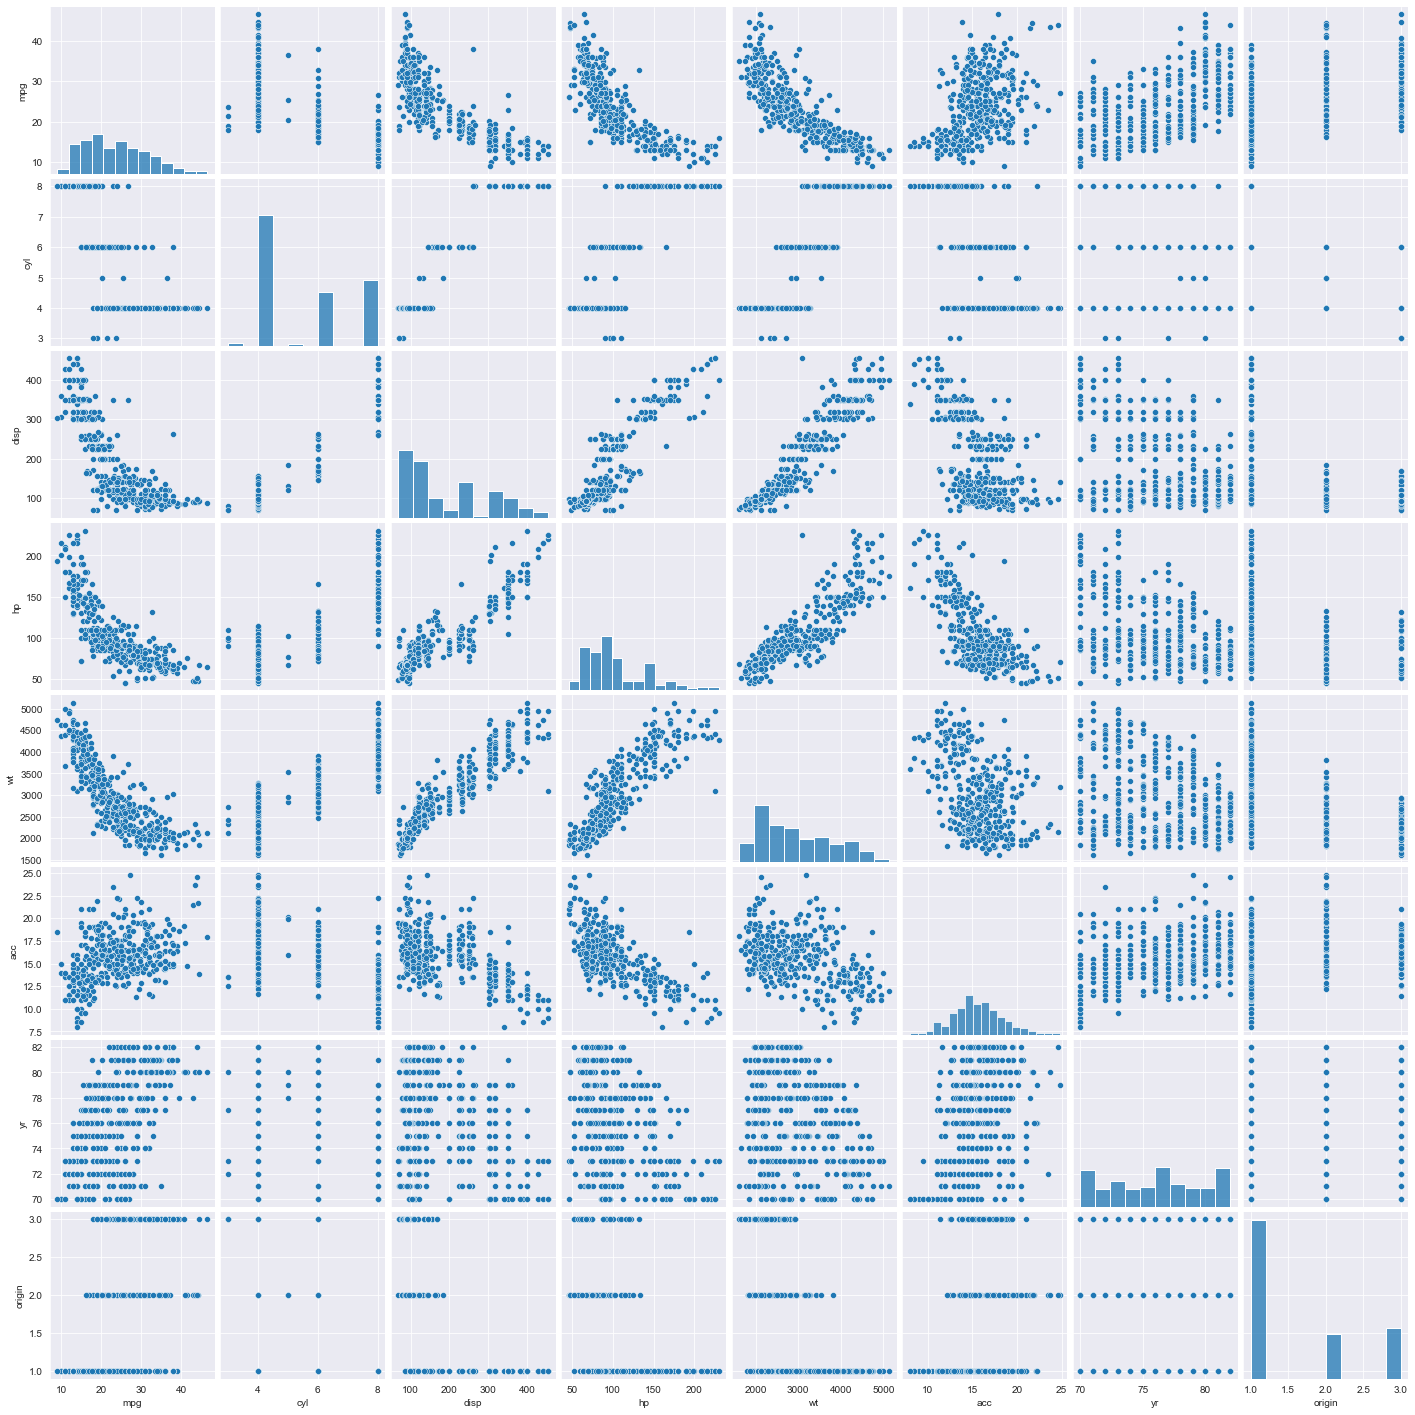

In [25]:
sns.set_style("darkgrid")

sns.pairplot(df3)

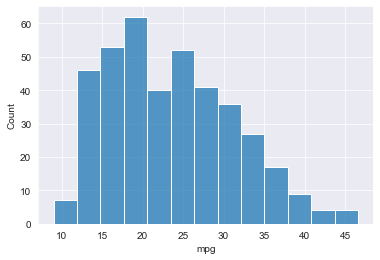

In [26]:
sns.set_style("darkgrid")
sns.histplot(df3['mpg'])
plt.show()

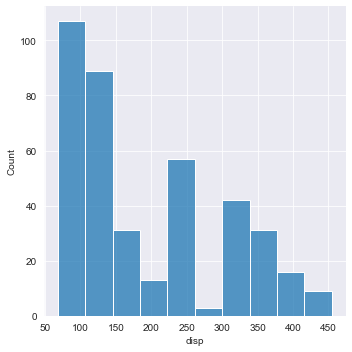

In [27]:
sns.set_style("darkgrid")
sns.displot(data=df3, x="disp")

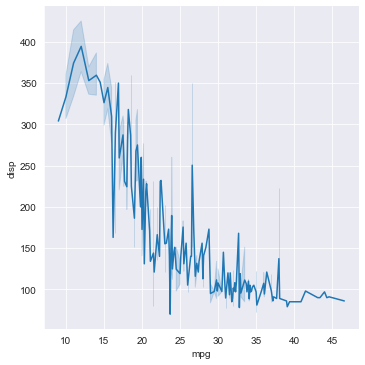

In [19]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=df3, kind="line",
    x="mpg", y="disp")

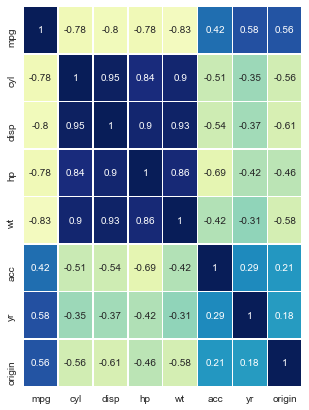

In [28]:
plt.figure(figsize=(5,7))
sns.heatmap(df3.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [29]:
df3.head()

mpg  cyl   disp     hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130.0  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165.0  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150.0  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150.0  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140.0  3449  10.5  70       1                ford torino

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB



### Scaling the data  for Clustering and dropping the unwanted column for further model fit.


In [31]:
#dropping the Column name "Car_name"
df10 = df3.drop(['car_name'], axis = 1)

In [32]:
df10.dropna(inplace=True) 

In [33]:
from scipy.stats import zscore

In [34]:
dfscl = df10.apply(zscore)
dfscl.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.698638  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315   
1 -1.083498  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315   
2 -0.698638  1.483947  1.182542  1.184397  0.540382 -1.648189 -1.625315   
3 -0.955212  1.483947  1.048584  1.184397  0.536845 -1.285258 -1.625315   
4 -0.826925  1.483947  1.029447  0.924265  0.555706 -1.829655 -1.625315   

     origin  
0 -0.716641  
1 -0.716641  
2 -0.716641  
3 -0.716641  
4 -0.716641

C:\Users\gunja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

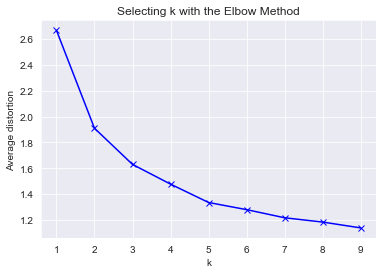

In [35]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfscl)
    prediction=model.predict(dfscl)
    meanDistortions.append(sum(np.min(cdist(dfscl, model.cluster_centers_, 'euclidean'), axis=1)) / dfscl.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### <font color = Purple> Considering The Value of K as 2 since the data takes a sharp turn at 3 and 2. 

In [36]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(dfscl)
prediction=final_model.predict(dfscl)

#Append the prediction 
df10["GROUP"] = prediction
dfscl["GROUP"] = prediction
print("Groups Assigned : \n")
dfscl.head()

Groups Assigned : 



mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.698638  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315   
1 -1.083498  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315   
2 -0.698638  1.483947  1.182542  1.184397  0.540382 -1.648189 -1.625315   
3 -0.955212  1.483947  1.048584  1.184397  0.536845 -1.285258 -1.625315   
4 -0.826925  1.483947  1.029447  0.924265  0.555706 -1.829655 -1.625315   

     origin  GROUP  
0 -0.716641      0  
1 -0.716641      0  
2 -0.716641      0  
3 -0.716641      0  
4 -0.716641      0

In [37]:
dClust = dfscl.groupby(['GROUP'])
dClust.mean()

mpg       cyl      disp        hp        wt       acc        yr  \
GROUP                                                                         
0     -0.902217  1.029728  1.011051  0.829038  0.958997 -0.436690 -0.437763   
1      0.676663 -0.772296 -0.758288 -0.621778 -0.719248  0.327518  0.328322   

         origin  
GROUP            
0     -0.694444  
1      0.520833

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

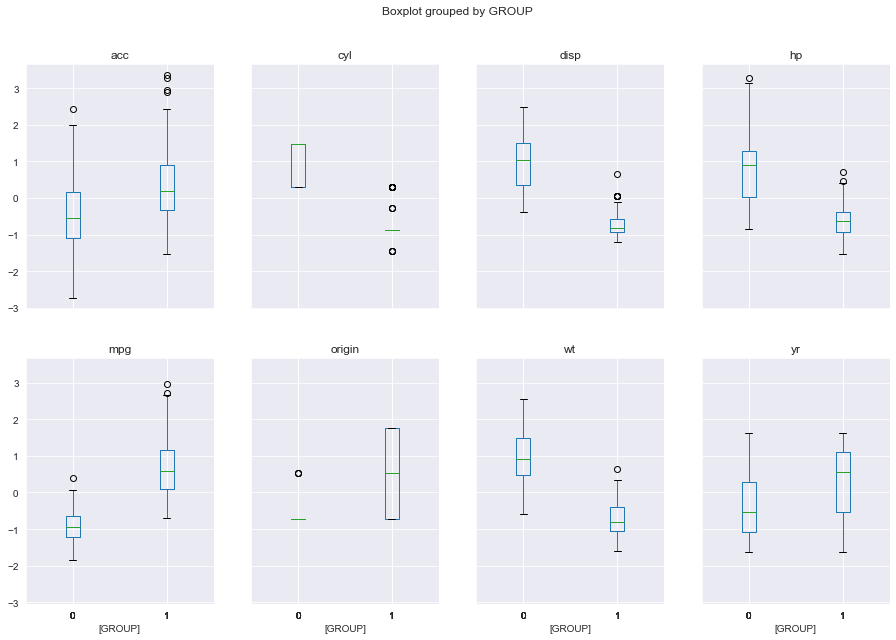

In [38]:
sns.set_style("darkgrid")
dfscl.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [39]:
# Considering K = 3
final_model=KMeans(3)
final_model.fit(dfscl)
prediction=final_model.predict(dfscl)

#Append the prediction 
df10["GROUP"] = prediction
dfscl["GROUP"] = prediction
print("Groups Assigned : \n")
df10.head()

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  origin  GROUP
0  18.0    8  307.0  130.0  3504  12.0  70       1      1
1  15.0    8  350.0  165.0  3693  11.5  70       1      1
2  18.0    8  318.0  150.0  3436  11.0  70       1      1
3  16.0    8  304.0  150.0  3433  12.0  70       1      1
4  17.0    8  302.0  140.0  3449  10.5  70       1      1

In [40]:
dlcust1 = dfscl.groupby(['GROUP'])
dlcust1.mean()

mpg       cyl      disp        hp        wt       acc        yr  \
GROUP                                                                         
0      0.711195 -0.822869 -0.791750 -0.641632 -0.749779  0.340470  0.304031   
1     -1.156649  1.483947  1.489139  1.506794  1.391452 -1.075993 -0.682654   
2     -0.517510  0.435750  0.350659 -0.051540  0.353050  0.336699 -0.010632   

         origin  
GROUP            
0      0.578659  
1     -0.716641  
2     -0.672247

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

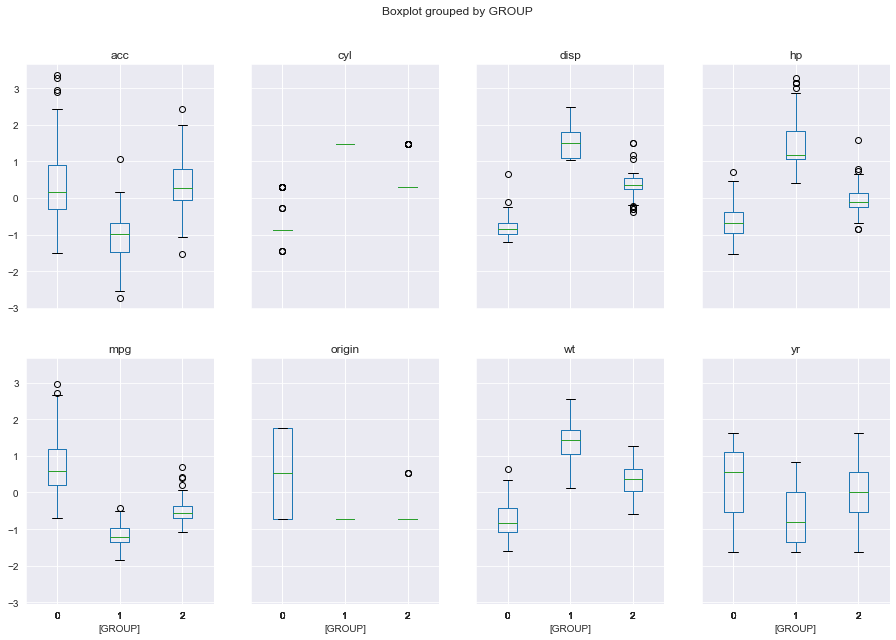

In [41]:
dfscl.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#### <font color= Purple> <b>Using 3 Clusters gives us  better understanding and differentiation for the data hence, setting K values as 3. 

In [42]:
#Seting the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15)

In [43]:
kmeans.fit(dfscl)

KMeans(n_clusters=3, n_init=15)

In [44]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.15664890e+00,  1.48394702e+00,  1.48913886e+00,
         1.50679413e+00,  1.39145217e+00, -1.07599340e+00,
        -6.82653685e-01, -7.16641045e-01,  1.00000000e+00],
       [ 7.11195473e-01, -8.22869386e-01, -7.91749596e-01,
        -6.41632289e-01, -7.49779138e-01,  3.40470407e-01,
         3.04030550e-01,  5.78659046e-01,  6.66133815e-16],
       [-5.17509932e-01,  4.35750337e-01,  3.50659059e-01,
        -5.15397438e-02,  3.53050380e-01,  3.36698958e-01,
        -1.06320400e-02, -6.72247352e-01,  2.00000000e+00]])

In [45]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(dfscl) )
print(centroid_df)

        mpg       cyl      disp        hp        wt       acc        yr  \
0 -1.156649  1.483947  1.489139  1.506794  1.391452 -1.075993 -0.682654   
1  0.711195 -0.822869 -0.791750 -0.641632 -0.749779  0.340470  0.304031   
2 -0.517510  0.435750  0.350659 -0.051540  0.353050  0.336699 -0.010632   

     origin         GROUP  
0 -0.716641  1.000000e+00  
1  0.578659  6.661338e-16  
2 -0.672247  2.000000e+00  


In [46]:
centroid_df.mean()

mpg      -0.320988
cyl       0.365609
disp      0.349349
hp        0.271207
wt        0.331574
acc      -0.132941
yr       -0.129752
origin   -0.270076
GROUP     1.000000
dtype: float64

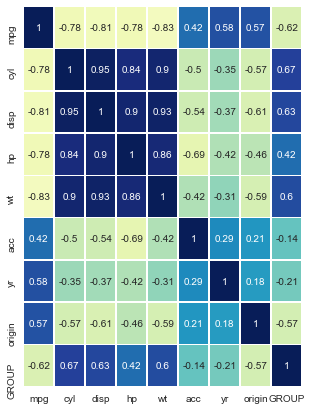

In [47]:
plt.figure(figsize=(5,7))
sns.heatmap(dfscl.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

<font color = Purple> 
Going by the Heatmap we can see there is a correlation between these variables:
    
- MPG & Acc = 0.42
- CYL & Disp = 0.95
- Disp & Cyl = 0.95
- HP & Displacement = 0.90 
- HP & Weight = 0.86. 

In [48]:
from sklearn.cluster import AgglomerativeClustering 

In [49]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [50]:
model.fit(dfscl)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [51]:
dfscl['labels'] = model.labels_
dfscl.head(10)

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.698638  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315   
1 -1.083498  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315   
2 -0.698638  1.483947  1.182542  1.184397  0.540382 -1.648189 -1.625315   
3 -0.955212  1.483947  1.048584  1.184397  0.536845 -1.285258 -1.625315   
4 -0.826925  1.483947  1.029447  0.924265  0.555706 -1.829655 -1.625315   
5 -1.083498  1.483947  2.244637  2.433030  1.607198 -2.011120 -1.625315   
6 -1.211785  1.483947  2.483848  3.005320  1.622523 -2.374052 -1.625315   
7 -1.211785  1.483947  2.349890  2.875254  1.573013 -2.555517 -1.625315   
8 -1.211785  1.483947  2.493416  3.135386  1.706218 -2.011120 -1.625315   
9 -1.083498  1.483947  1.871469  2.224924  1.028406 -2.555517 -1.625315   

     origin  GROUP  labels  
0 -0.716641      1       2  
1 -0.716641      1       2  
2 -0.716641      1       2  
3 -0.716641      1       2  
4 -0.716641      1       2  
5 -0.716641      1       2  
6 -0.716641      1       2  
7 -0.716641      1       2  
8 -0.716641      1       2  
9 -0.716641      1       2

In [52]:
dfsclClust = dfscl.groupby(['labels'])

In [53]:
dfsclClust.mean()

mpg       cyl      disp        hp        wt       acc        yr  \
labels                                                                         
0       0.711195 -0.822869 -0.791750 -0.641632 -0.749779  0.340470  0.304031   
1      -0.517510  0.435750  0.350659 -0.051540  0.353050  0.336699 -0.010632   
2      -1.156649  1.483947  1.489139  1.506794  1.391452 -1.075993 -0.682654   

          origin  GROUP  
labels                   
0       0.578659      0  
1      -0.672247      2  
2      -0.716641      1

In [54]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [55]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [56]:
# is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfscl, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfscl))
c

0.8001113668343096

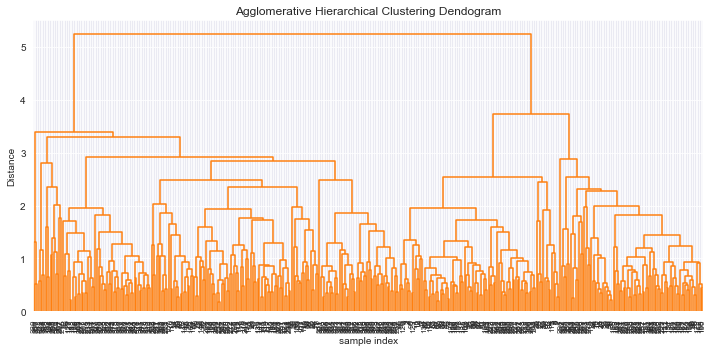

In [57]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [58]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfscl, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(dfscl))

c

0.7917184905809185

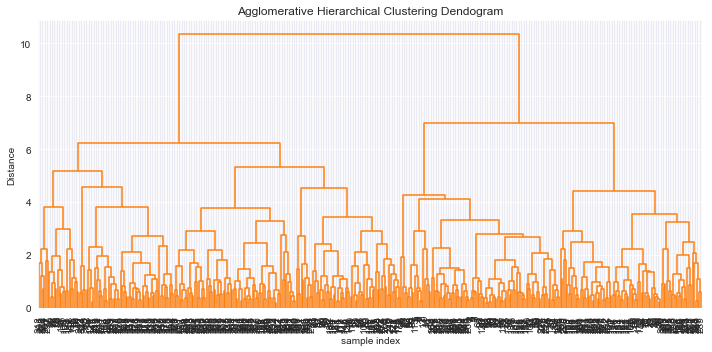

In [59]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [60]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfscl, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(dfscl))

c

0.7835085680246372

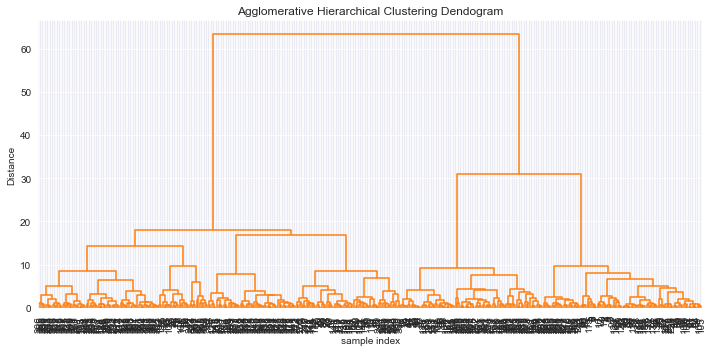

In [61]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

<b> <u><font color = teal> Using the distance measure along with avearage method gives us a better cophenet index.

In [62]:
dMatrix = np.cov(dfscl,rowvar=False)
print(dMatrix)

[[ 1.00255754 -0.7796063  -0.80718609 -0.78041765 -0.83437272  0.42441122
   0.58202573  0.5666543  -0.50042625 -0.6673167 ]
 [-0.7796063   1.00255754  0.95325507  0.84513932  0.89982281 -0.50597413
  -0.34653145 -0.57038666  0.54398229  0.80712294]
 [-0.80718609  0.95325507  1.00255754  0.89955178  0.93538058 -0.54519129
  -0.37080113 -0.61610682  0.5086695   0.79133879]
 [-0.78041765  0.84513932  0.89955178  1.00255754  0.86674883 -0.69095816
  -0.41742634 -0.45633557  0.34010223  0.71342189]
 [-0.83437272  0.89982281  0.93538058  0.86674883  1.00255754 -0.41790529
  -0.30991047 -0.58650153  0.48621219  0.74488296]
 [ 0.42441122 -0.50597413 -0.54519129 -0.69095816 -0.41790529  1.00255754
   0.29105861  0.21328991 -0.11401011 -0.44502314]
 [ 0.58202573 -0.34653145 -0.37080113 -0.41742634 -0.30991047  0.29105861
   1.00255754  0.18199198 -0.16868447 -0.33051658]
 [ 0.5666543  -0.57038666 -0.61610682 -0.45633557 -0.58650153  0.21328991
   0.18199198  1.00255754 -0.46112996 -0.48899564]


In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(dfscl)

PCA(n_components=6)

In [92]:
print(pca.explained_variance_)

[6.28477196 1.04256632 0.84218906 0.49518282 0.30820177 0.19786508]


In [93]:
print(pca.components_)

[[-0.3563906   0.3784428   0.38744984  0.3655042   0.37275762 -0.23468591
  -0.19075042 -0.2614852   0.21447954  0.31822738]
 [ 0.0310696   0.08904025  0.05501937 -0.22409787  0.13634794  0.55724923
   0.50301452 -0.47551412  0.35775208  0.0402271 ]
 [-0.2987083  -0.10973062 -0.11528871 -0.20332873 -0.07755661  0.46599505
  -0.75976185 -0.12366562  0.15784544 -0.05903928]
 [ 0.06694065 -0.21095033 -0.11215406 -0.08681669 -0.27292273 -0.46582079
  -0.08984509 -0.78340263 -0.06262917 -0.11710326]
 [ 0.08740474  0.14669925 -0.0670935  -0.2773455  -0.31788684 -0.33214689
  -0.0281285   0.24142991  0.77939188  0.10729755]
 [ 0.73306634  0.38508289  0.23931141 -0.07438693 -0.13997686  0.14892791
  -0.2961366  -0.10185509 -0.17270705  0.28609338]]


In [94]:
print(pca.explained_variance_ratio_)

[0.67101123 0.1113125  0.08991867 0.05286958 0.03290602 0.02112562]


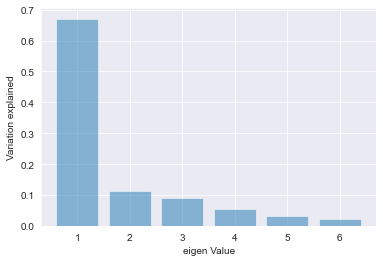

In [115]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

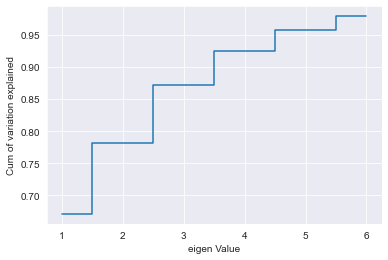

In [116]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [97]:
pca3 = PCA(n_components=4)
pca3.fit(dfscl)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(dfscl)

[[-0.3563906   0.3784428   0.38744984  0.3655042   0.37275762 -0.23468591
  -0.19075042 -0.2614852   0.21447954  0.31822738]
 [ 0.0310696   0.08904025  0.05501937 -0.22409787  0.13634794  0.55724923
   0.50301452 -0.47551412  0.35775208  0.0402271 ]
 [-0.2987083  -0.10973062 -0.11528871 -0.20332873 -0.07755661  0.46599505
  -0.75976185 -0.12366562  0.15784544 -0.05903928]
 [ 0.06694065 -0.21095033 -0.11215406 -0.08681669 -0.27292273 -0.46582079
  -0.08984509 -0.78340263 -0.06262917 -0.11710326]]
[0.67101123 0.1113125  0.08991867 0.05286958]


In [101]:
Xpca3

array([[ 2.98785223, -0.91633445,  0.43827781,  0.42477772],
       [ 3.7428389 , -1.18043125,  0.21883977,  0.29755176],
       [ 3.2740861 , -1.24030615,  0.15745145,  0.55874363],
       ...,
       [-1.58609974,  0.03528399, -1.88253898,  1.7891441 ],
       [-1.95758747,  1.50933358, -0.53256556,  0.49258804],
       [-2.09632754,  1.68033969, -0.53567689,  0.34683649]])

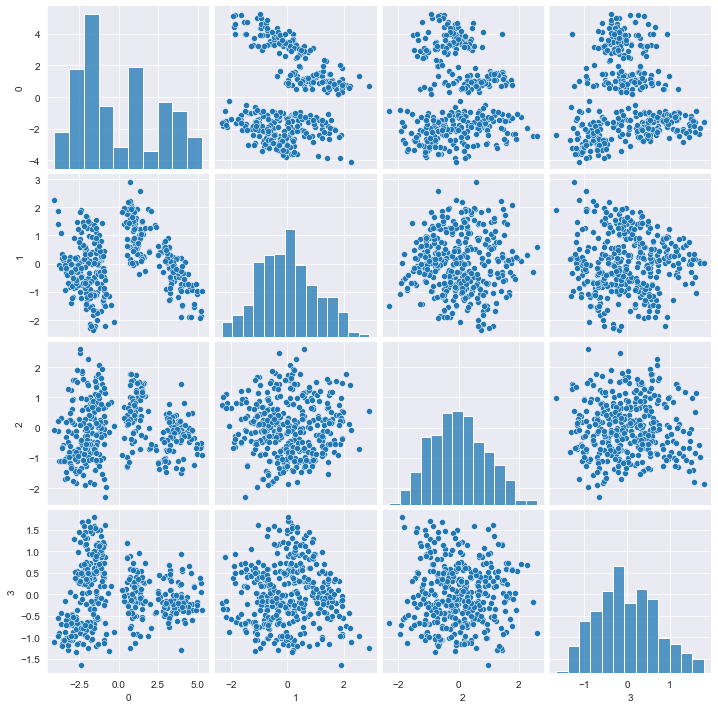

In [102]:
sns.pairplot(pd.DataFrame(Xpca3))

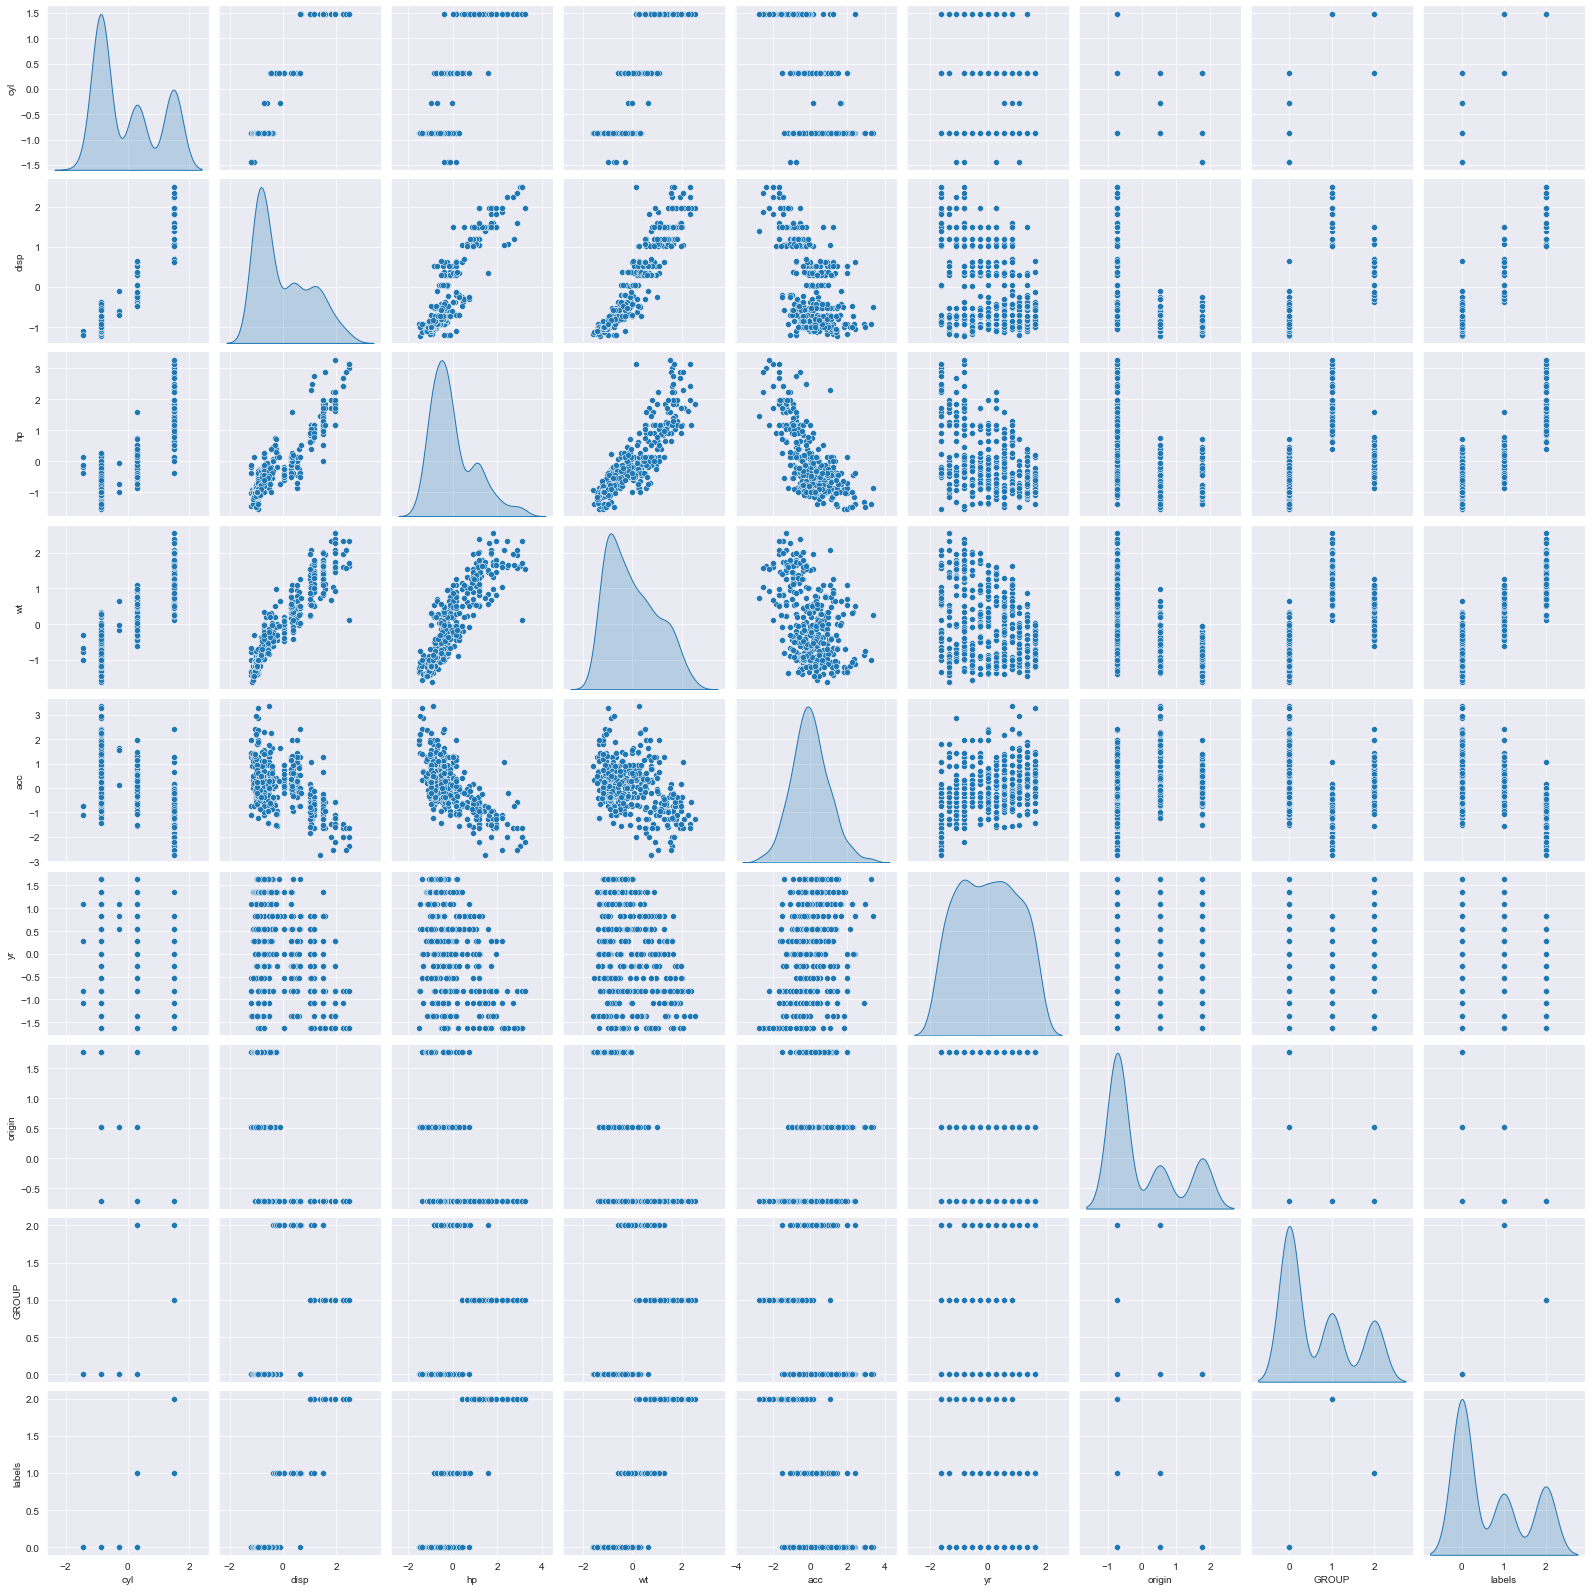

In [103]:
X = dfscl.drop(['mpg'], axis=1)
# the dependent variable
y = dfscl[['mpg']]

sns.pairplot(X, diag_kind='kde')

In [73]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(df10, y)
regression_model.score(df10, y)

1.0

In [74]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.8743904183525623

<b> <font color = Teal> After using the PCA data with the linar regression, it looks like the raw data is an overfit for the same and hence, post normalizing the data after identifying the PCA, fitting it into a Linear Regression gives us a score of 87%, we may need few more realeavant data to make sure acheive a better score when we fit the PCA variables in Linear Regression or other models. 

# =========================================================

##  <b> <font color = red> Part 2:

### <font color = Navy Blue> DOMAIN: Manufacturing 

#### CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country.s

- <b> <font color = Red> DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality.
    
<b> Attribute Information: 
    
     -1.A, B, C, D: specific chemical composition measure of the wine
     -2.Quality: quality of wine [ Low and High ]

PROJECT OBJECTIVE: Goal is to build a synthetic data generation model using the existing data provided by the company.

In [75]:
missing_values = ["n/a", "na","?", "--","-"]                                                                            
data1 = pd.read_excel(r'C:\Users\gunja\Downloads/Part2 - Company.xlsx', na_values = missing_values)
data1.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [104]:
data1.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [105]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [106]:
data1.dtypes

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

In [107]:
data1.duplicated().sum()

0

In [108]:
data1.describe().transpose()

count        mean        std  min   25%    50%    75%    max
A   61.0  118.557377  61.771494  3.0  61.0  136.0  171.0  200.0
B   61.0  116.639344  57.897908  5.0  63.0  138.0  168.0  200.0
C   61.0  114.081967  65.615368  3.0  59.0  135.0  174.0  200.0
D   61.0  114.459016  63.144431  3.0  51.0  132.0  174.0  199.0

### Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc

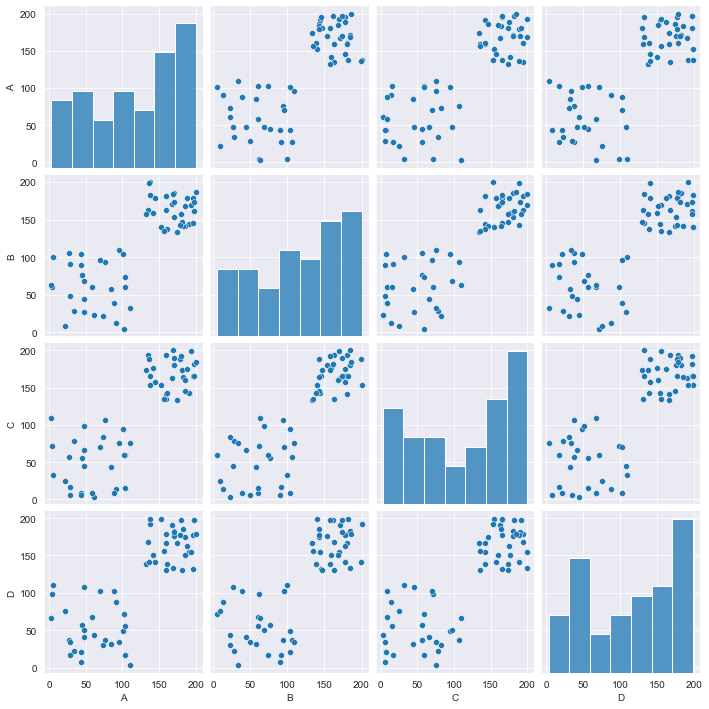

In [109]:
sns.pairplot(pd.DataFrame(data1))

C:\Users\gunja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quality', ylabel='count'>

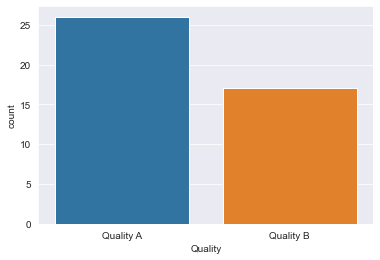

In [110]:
sns.countplot(data1['Quality'])

C:\Users\gunja\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A', ylabel='Density'>

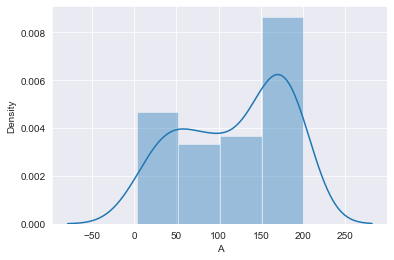

In [111]:
sns.distplot(data1['A'])

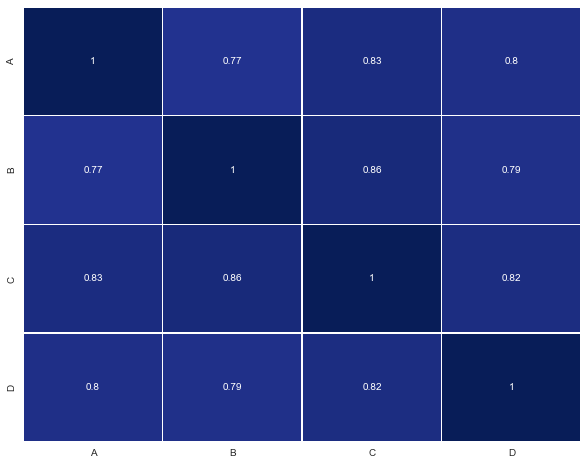

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [113]:
df20 = data1.drop(['Quality'], axis = 1)

In [114]:
df20s = df20.apply(zscore)
df20s.head()

A         B         C         D
0 -1.168034 -1.561080 -1.061569 -0.103138
1  0.904992  0.284923  0.306077  0.823013
2  0.660147  0.807376  0.321443  0.264129
3 -0.939512 -1.630740 -1.706975 -1.125099
4 -0.972158 -0.986381 -1.614775 -0.741864

C:\Users\gunja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

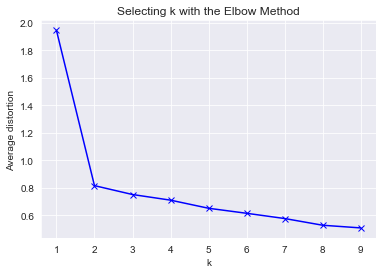

In [87]:
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df20s)
    prediction=model.predict(df20s)
    meanDistortions.append(sum(np.min(cdist(df20s, model.cluster_centers_, 'euclidean'), axis=1)) / df20s.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [88]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(df20s)
prediction=final_model.predict(df20s)

#Append the prediction 
df20["GROUP"] = prediction
df20s["GROUP"] = prediction
print("Groups Assigned : \n")
df20s.head()

Groups Assigned : 



A         B         C         D  GROUP
0 -1.168034 -1.561080 -1.061569 -0.103138      1
1  0.904992  0.284923  0.306077  0.823013      0
2  0.660147  0.807376  0.321443  0.264129      0
3 -0.939512 -1.630740 -1.706975 -1.125099      1
4 -0.972158 -0.986381 -1.614775 -0.741864      1

array([[<AxesSubplot:title={'center':'A'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'B'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'C'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'D'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

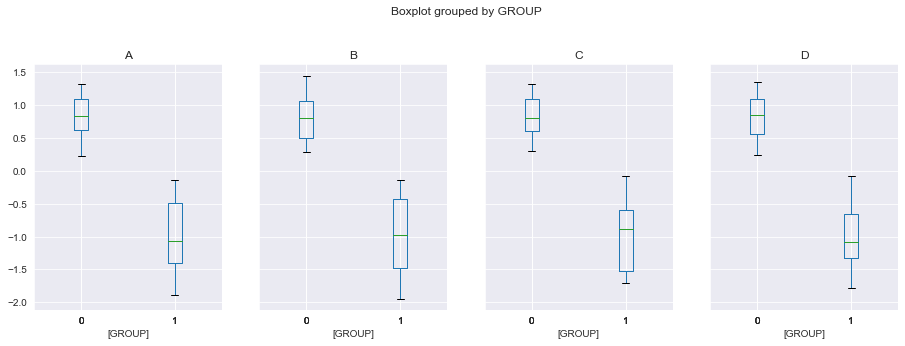

In [89]:
df20s.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<b> <font color = Teal> 
   Going by the objective, clustering has been used so that we can we can cluster the componets from the data and idenitfy the similar set of data and use it to group it in order to find the missing taget variable. 
    
    Hence, we obove we can observe that using 2 clusters is a better option as we can see that it gives a very well shaped indipendent data. 

# ===========================================================

# <b> <font color = red> Part 3:

### <font color = Navy Blue> DOMAIN: Automobile  

####  CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

<b><font color = Red> 
    
PROJECT OBJECTIVE:
    
Apply dimensionality reduction technique – 
    
- PCA and train a model using principal components instead of training the model using just the raw data.

In [688]:
missing_values = ["n/a", "na","?", "--","-"]                                                                            
dfr1 = pd.read_csv(r'C:\Users\gunja\Downloads/Part3 - vehicle.csv', na_values = missing_values)
dfr1.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

In [689]:
dfr1.dropna(inplace=True) 

In [690]:
dfr1.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [691]:
dfr1.duplicated().sum()

0


<b> <font color = Purple> The data is free of Null values and does not have duplication, proceeding with the model preparation. 

In [692]:
dfr1.describe().transpose()

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

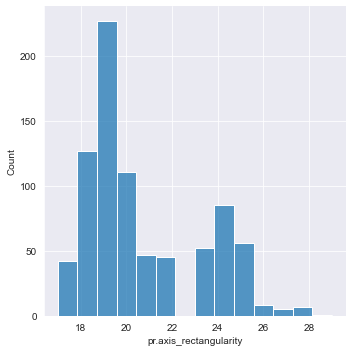

In [693]:
sns.set_style("darkgrid")
sns.displot(data=dfr1, x="pr.axis_rectangularity")

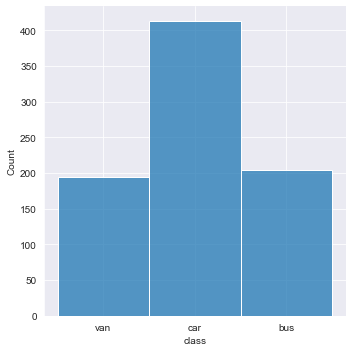

In [694]:
sns.set_style("darkgrid")
sns.displot(data=dfr1, x="class")

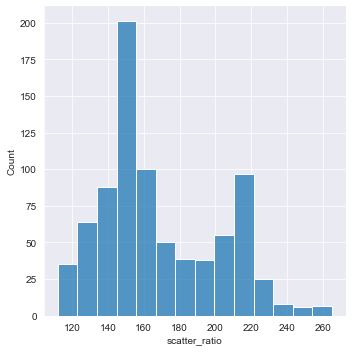

In [695]:
sns.set_style("darkgrid")
sns.displot(data=dfr1, x="scatter_ratio")

<AxesSubplot:xlabel='max.length_aspect_ratio', ylabel='radius_ratio'>

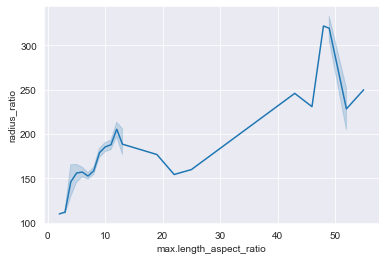

In [696]:
sns.set_style("darkgrid")
sns.lineplot(
    data=dfr1, x="max.length_aspect_ratio", y="radius_ratio", err_style="band")

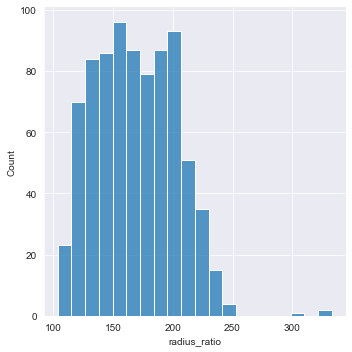

In [697]:
sns.set_style("darkgrid")
sns.displot(data=dfr1, x="radius_ratio")

<AxesSubplot:xlabel='distance_circularity', ylabel='scaled_radius_of_gyration'>

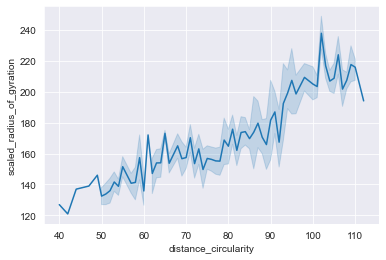

In [698]:
sns.set_style("darkgrid")

sns.lineplot(
    data=dfr1, x="distance_circularity", y="scaled_radius_of_gyration", err_style="band")

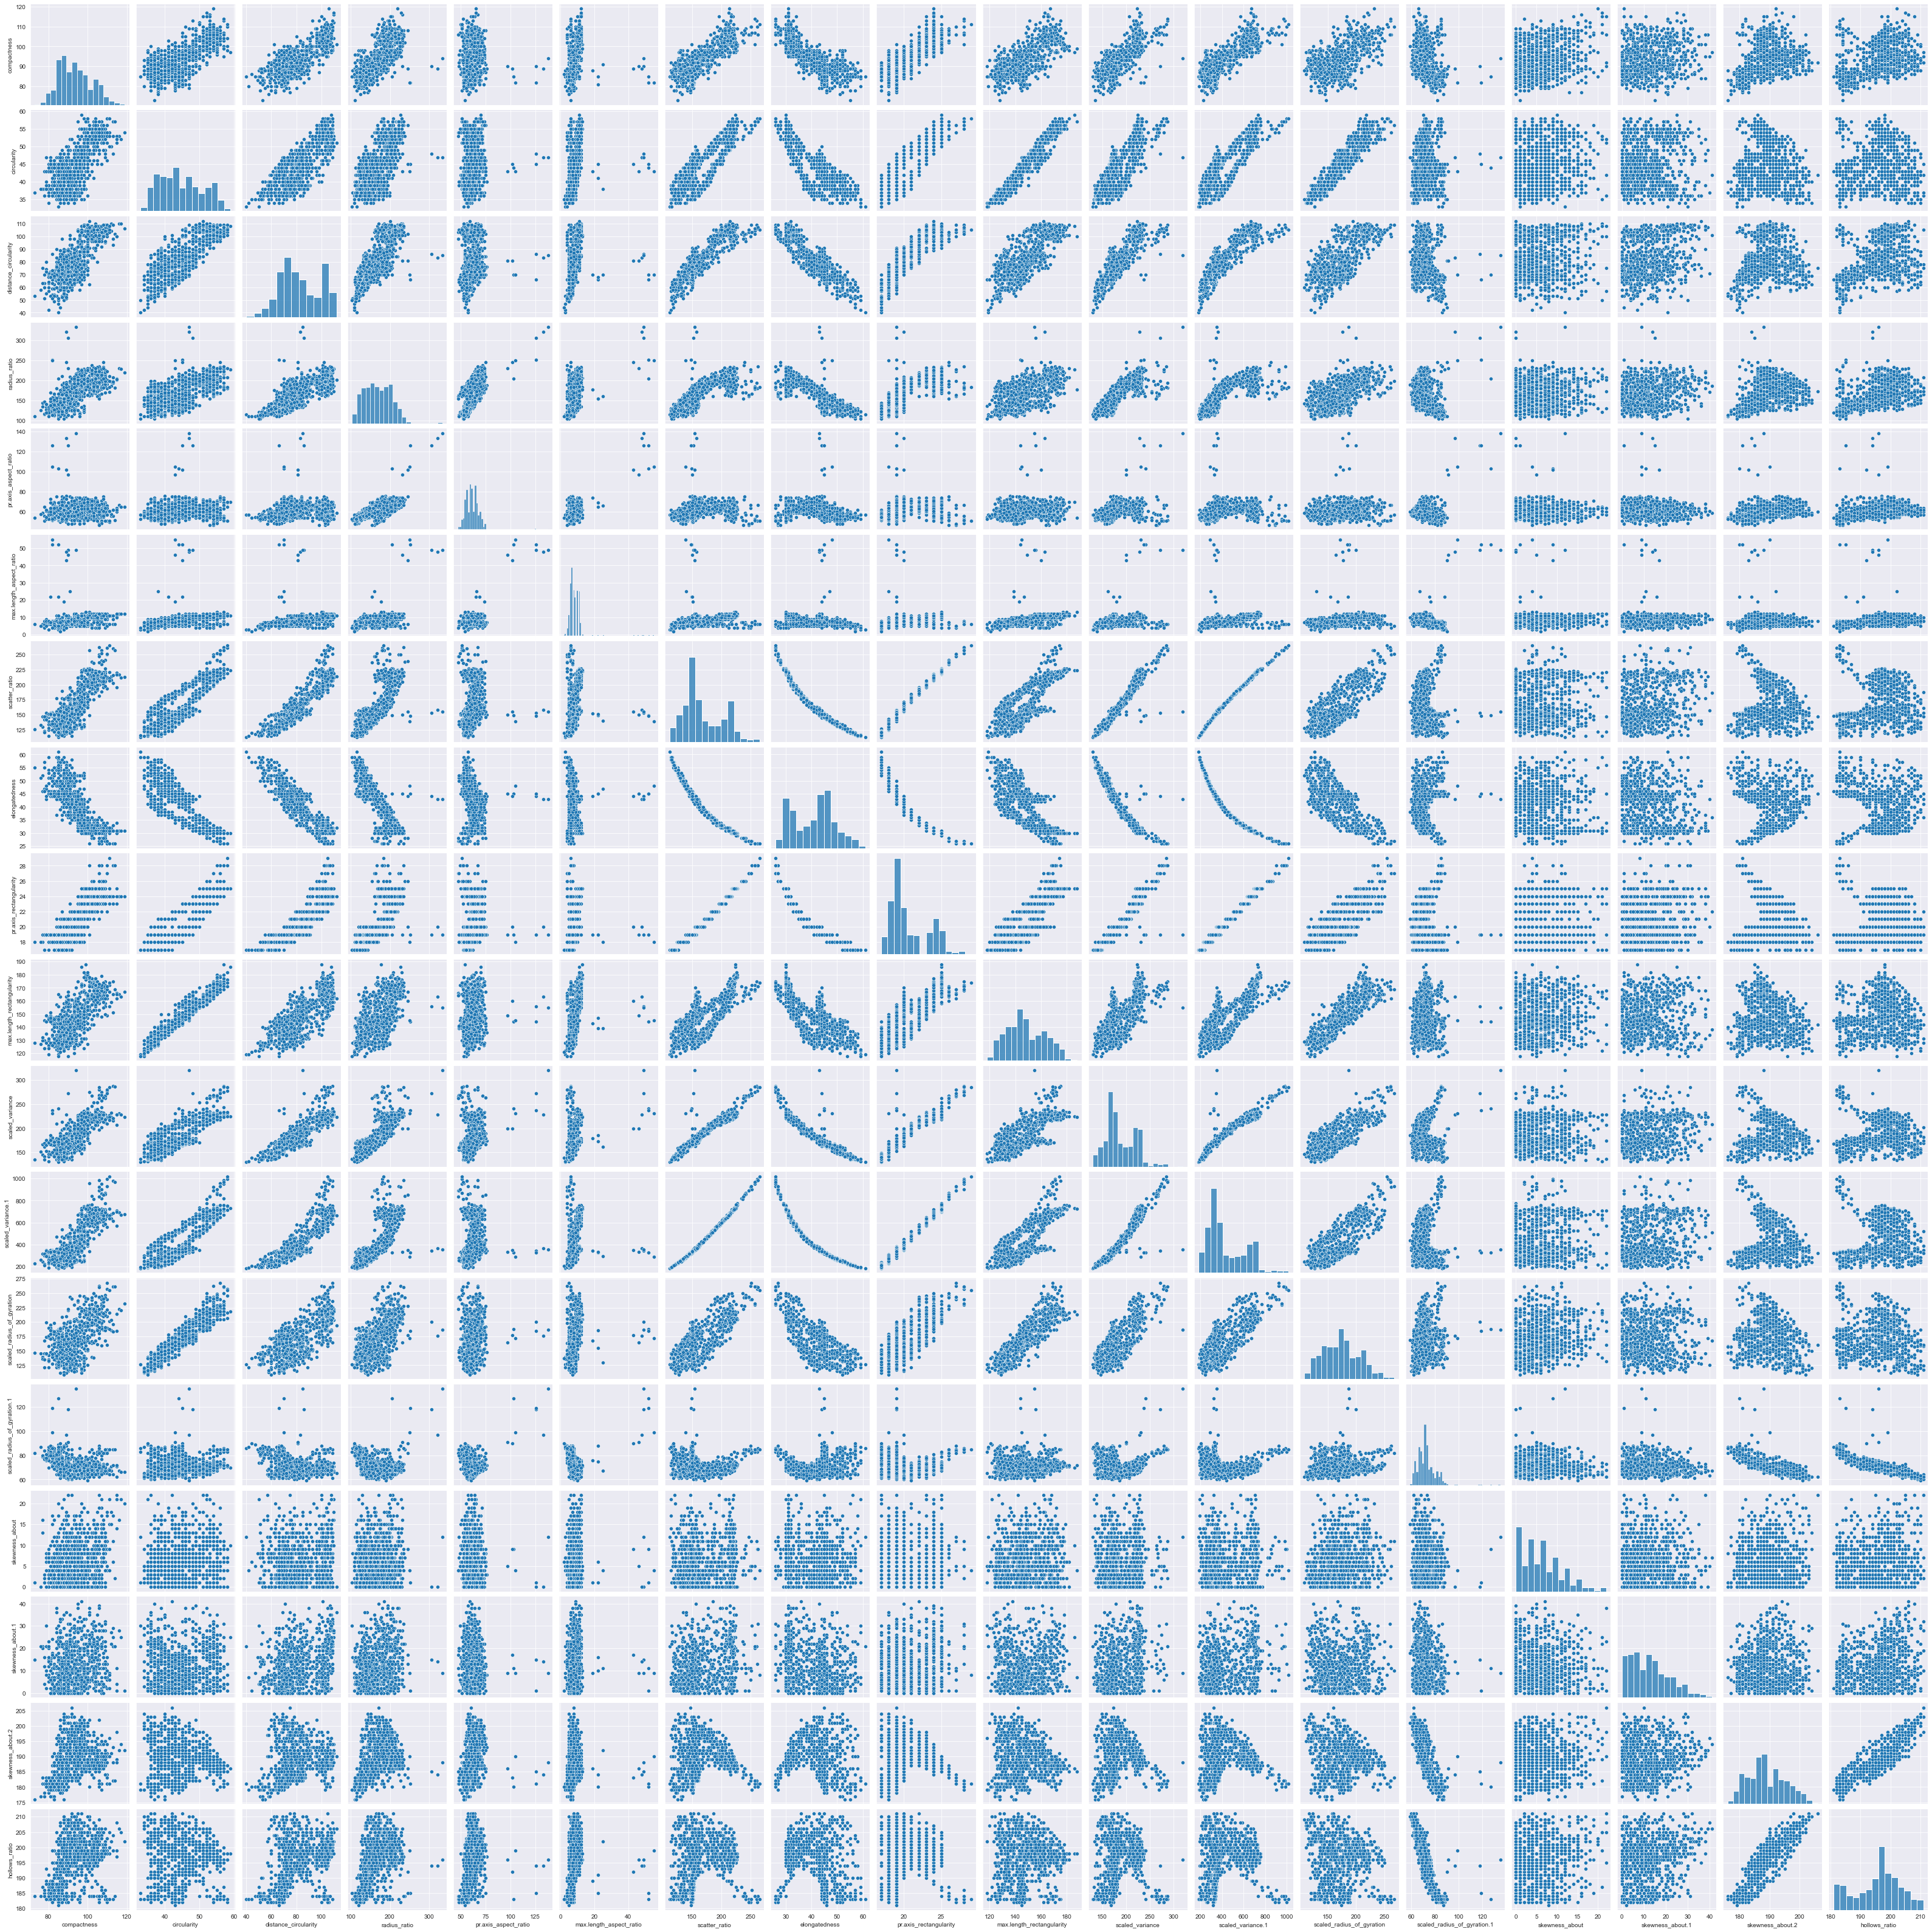

In [882]:
sns.pairplot(pd.DataFrame(dfr1))

In [868]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [870]:
x = dfr1.drop(labels= "class" , axis = 1)
y = dfr1["class"]
x.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [871]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [872]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [873]:
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.98969     0.68045578  0.76164421  0.67373131  0.10039207  0.17220312
   0.80583126 -0.77026509  0.80481313  0.66429141  0.76594616  0.81620921
   0.58591326 -0.18511592  0.25533466  0.15496772  0.25787717  0.31699673]
 [ 0.68045578  1.00681851  0.75804941  0.58662368  0.14884848  0.23075484
   0.85126507 -0.79792327  0.84981666  0.96214141  0.80109159  0.85229174
   0.95517681  0.14527422  0.17711364 -0.01980497 -0.1815467  -0.03148337]
 [ 0.76164421  0.75804941  0.92959844  0.72872372  0.17035015  0.25618257
   0.87041579 -0.85657234  0.85970331  0.72518304  0.83336143  0.86058953
   0.68600061 -0.14799149  0.14116102  0.27862001  0.08976572  0.26816455]
 [ 0.67373131  0.58662368  0.72872372  0.99214258  0.6989233   0.44577811
   0.7107798  -0.75474778  0.67986223  0.53689686  0.79015747  0.7020209
   0.51191513 -0.10311296  0.0681798   0.20559965  0.35181057  0.44707312]
 [ 0.10039207  0.14884848  0.17035015  0.6989233   1.03651     0.60797274
   0.09667497

In [874]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 2.74155579e-01  1.32637806e-01  1.26685700e-01  8.02375986e-02
  -5.76621087e-02 -1.28012683e-01 -5.17412649e-01  4.76424200e-01
  -5.35768774e-01 -2.03882304e-01  4.04956419e-02 -1.18056377e-01
  -1.40893934e-01  1.57280118e-03 -9.73212736e-03 -4.07932951e-02
  -4.34709509e-02  5.15274170e-02]
 [ 2.97494692e-01 -1.28478138e-01  1.68729384e-02  2.05707533e-01
   9.97198625e-02  2.88680228e-01  2.17960876e-01  1.62778118e-01
  -3.89108718e-02  1.00235367e-01 -2.10610288e-02  1.08687833e-01
   1.36066177e-02  1.37956791e-02 -1.68435545e-01  2.55972783e-01
  -7.14134007e-01 -2.38815350e-01]
 [ 2.93859184e-01  8.16667177e-02  5.68538363e-02 -7.17788067e-02
  -3.22692867e-02  1.44378536e-01 -6.89262532e-02 -4.32110133e-01
  -1.53665531e-01 -3.05763602e-01 -6.96063714e-01  1.69277144e-02
   1.61408633e-01 -1.06706585e-02  3.50743910e-02 -1.98671816e-01
  -2.31181869e-02 -1.26249069e-01]
 [ 2.60433386e-01  2.20327478e-01 -2.88670341e-01 -4.72461427e-02
   1.21332324e-02 -2.25

In [875]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.00240228  69.42890821  79.7500716   86.51600812  91.50807665
  94.39395748  96.33730296  97.5455944   98.40264969  98.89854118
  99.24358961  99.48180092  99.68375548  99.79924483  99.88937278
  99.96252959  99.99796918 100.        ]


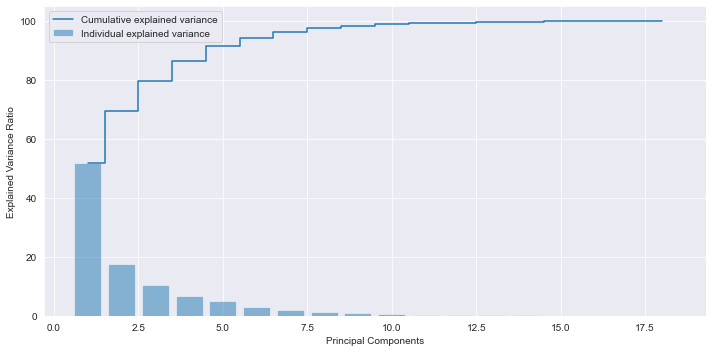

In [876]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [888]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:9]

[(9.26007804389882,
  array([ 0.27415558,  0.29749469,  0.29385918,  0.26043339,  0.081308  ,
          0.09235433,  0.31995423, -0.30898212,  0.31712816,  0.2815538 ,
          0.31445226,  0.32010414,  0.28040357,  0.01240879,  0.05355498,
          0.06413183,  0.00332526,  0.04705277])),
 (3.1031413521846423,
  array([ 0.13263781, -0.12847814,  0.08166672,  0.22032748,  0.16432585,
          0.04134999, -0.03237655, -0.03246912, -0.04732189, -0.10901139,
         -0.03880799, -0.03874218, -0.20562725, -0.45539391,  0.0394427 ,
          0.11596789,  0.5435875 ,  0.55007632])),
 (1.8378916034509887,
  array([ 0.1266857 ,  0.01687294,  0.05685384, -0.28867034, -0.66349749,
         -0.51920372,  0.10379678, -0.06633109,  0.11975574,  0.00245911,
         -0.06909093,  0.11608157,  0.01707032, -0.33612903,  0.13909983,
          0.07333862,  0.0390805 , -0.00184663])),
 (1.204811652144248,
  array([ 0.0802376 ,  0.20570753, -0.07177881, -0.04724614,  0.04234999,
          0.03654166, 

In [889]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(18,1), 
                      eigen_pairs[1][1].reshape(18,1)))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.27415558  0.13263781]
 [ 0.29749469 -0.12847814]
 [ 0.29385918  0.08166672]
 [ 0.26043339  0.22032748]
 [ 0.081308    0.16432585]
 [ 0.09235433  0.04134999]
 [ 0.31995423 -0.03237655]
 [-0.30898212 -0.03246912]
 [ 0.31712816 -0.04732189]
 [ 0.2815538  -0.10901139]
 [ 0.31445226 -0.03880799]
 [ 0.32010414 -0.03874218]
 [ 0.28040357 -0.20562725]
 [ 0.01240879 -0.45539391]
 [ 0.05355498  0.0394427 ]
 [ 0.06413183  0.11596789]
 [ 0.00332526  0.5435875 ]
 [ 0.04705277  0.55007632]]


In [890]:
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

In [891]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((487, 18), (18, 2), (487, 2), (326, 2))

In [892]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))

Before PCA score 0.9539877300613497
After PCA score 0.6717791411042945


Comparing the score it seems after PCA the SVC score has gone down hence we may need need more infromation, however, the before PCA score seems impressive, with 95% accuracy. 

# ======================================================



##  <b> <font color = red> Part 4:

### <font color = Navy Blue> DOMAIN: Sports management

  
####  CONTEXT: Company X is a sports management company for international cricket.

<b><font color = Teal> 
    
    
Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.
    
<font color = Grdey>     
Steps and task:
    
    -1.EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
    
      -2.Build a data driven model to rank all the players in the dataset using all or the most important performance         features

In [242]:
missing_values = ["n/a", "na","?", "--","-"]                                                                            
data4 = pd.read_csv(r'C:\Users\gunja\Downloads/Part4 - batting_bowling_ipl_bat.csv', na_values = missing_values)
data4.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [243]:
data4.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [244]:
data4.dropna(inplace=True) 

In [503]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          90 non-null     object 
 1   Runs          90 non-null     float64
 2   Ave           90 non-null     float64
 3   SR            90 non-null     float64
 4   Fours         90 non-null     float64
 5   Sixes         90 non-null     float64
 6   HF            90 non-null     float64
 7   Clus_kmeans4  90 non-null     int32  
 8   Clus_kmeans2  90 non-null     int32  
dtypes: float64(6), int32(2), object(1)
memory usage: 6.3+ KB


In [504]:
data4.describe()

Runs        Ave          SR      Fours      Sixes         HF  \
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000   
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889   
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656   
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000   
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000   
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000   
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000   
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000   

       Clus_kmeans4  Clus_kmeans2  
count     90.000000     90.000000  
mean       0.388889      0.388889  
std        0.490229      0.490229  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [505]:
data4.duplicated().sum()

0

<AxesSubplot:xlabel='Runs', ylabel='Ave'>

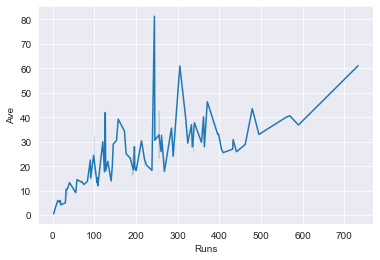

In [506]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data4, x="Runs", y="Ave", err_style="band")

<AxesSubplot:xlabel='SR', ylabel='Sixes'>

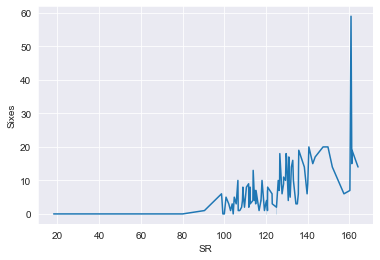

In [507]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data4, x="SR", y="Sixes", err_style="band")

<AxesSubplot:xlabel='SR', ylabel='Fours'>

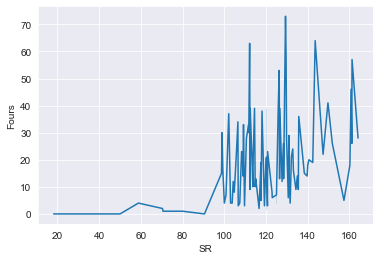

In [508]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data4, x="SR", y="Fours", err_style="band")

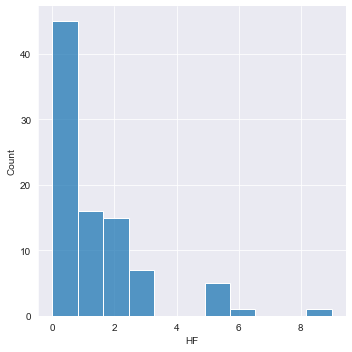

In [251]:
sns.set_style("darkgrid")
sns.displot(data=data4, x="HF")

<AxesSubplot:xlabel='SR', ylabel='Fours'>

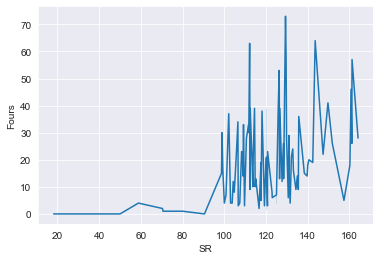

In [252]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data4, x="SR", y="Fours", err_style="band")

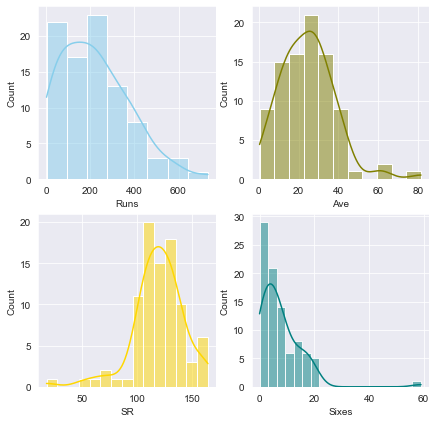

In [253]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.set_style("darkgrid")
sns.histplot(data=data4, x="Runs", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data4, x="Ave", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data4, x="SR", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data4, x="Sixes", kde=True, color="teal", ax=axs[1, 1])

plt.show()

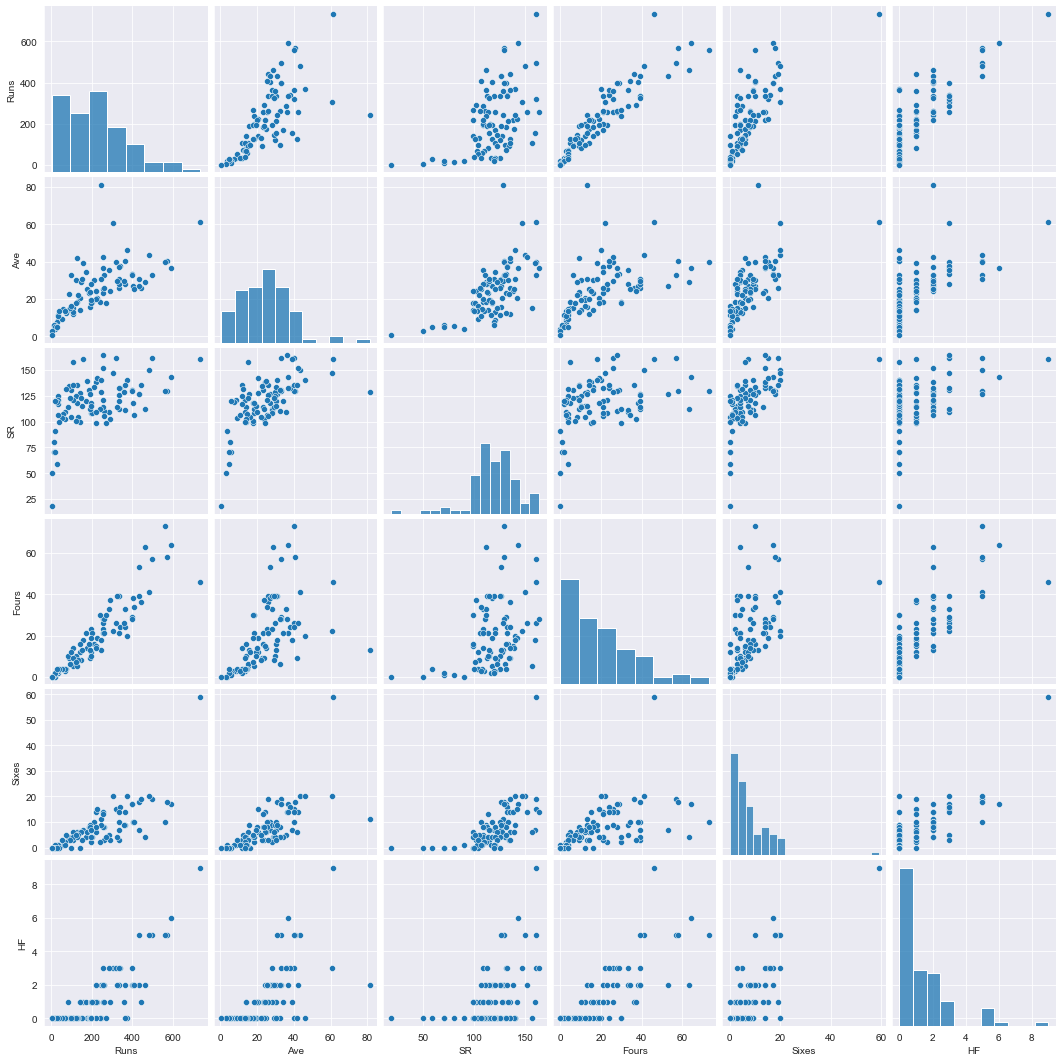

In [254]:
sns.pairplot(pd.DataFrame(data4))

<AxesSubplot:xlabel='Sixes', ylabel='HF'>

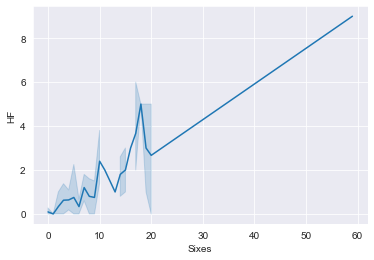

In [255]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data4, x="Sixes", y="HF", err_style="band")

<AxesSubplot:xlabel='HF', ylabel='Ave'>

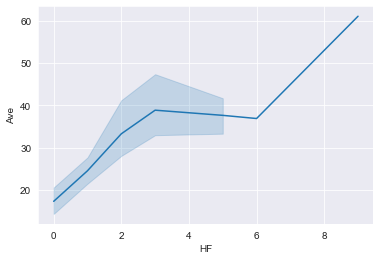

In [256]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data4, x="HF", y="Ave", err_style="band")

<AxesSubplot:xlabel='SR', ylabel='HF'>

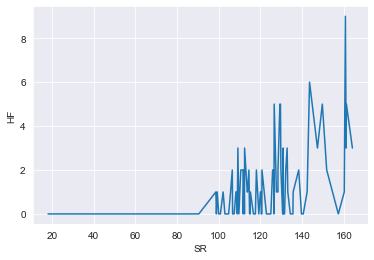

In [257]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data4, x="SR", y="HF", err_style="band")

In [260]:
datas1=data4.iloc[:,1:]
datas1.head()

Runs    Ave      SR  Fours  Sixes   HF
1  733.0  61.08  160.74   46.0   59.0  9.0
3  590.0  36.87  143.55   64.0   17.0  6.0
5  495.0  33.00  161.23   57.0   19.0  5.0
7  479.0  43.54  149.68   41.0   20.0  5.0
9  569.0  40.64  129.61   58.0   18.0  5.0

In [261]:
ipls=datas1.apply(zscore)
ipls.head(10)

Runs       Ave        SR     Fours     Sixes        HF
1   3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3   2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5   1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7   1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9   2.246490  1.174755  0.444038  2.343021  1.309851  2.269533
11  2.188568  1.127500  0.432136  3.262788  0.304422  2.269533
13  0.547464  2.678077  1.197712  0.135580  1.561209  1.078525
15  1.371234  0.457059  0.316088  1.177983  1.309851  2.269533
17  0.637564  1.117901  1.783053  0.380852  0.932815  1.078525
19  0.154886  4.179184  0.393453 -0.416280  0.430100  0.483020

In [308]:
k_means = KMeans(n_clusters = 2)

In [309]:
k_means.fit(ipls)

KMeans(n_clusters=2)

In [310]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [311]:
k_means.inertia_

321.0042106901775

In [313]:
k_means = KMeans(n_clusters = 3)
k_means.fit(ipls)
k_means.inertia_

231.7517392310182

In [314]:
k_means = KMeans(n_clusters = 4)
k_means.fit(ipls)
k_means.inertia_

186.0856800233013

In [317]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(ipls)
    wss.append(KM.inertia_)

C:\Users\gunja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [319]:
wss

[569.788888888889,
 321.0042106901775,
 231.24381387881246,
 186.0856800233013,
 152.18430051153072,
 123.17517910935231,
 102.81469417127899,
 84.97238038043228,
 73.24191713699076,
 67.93488387357137]

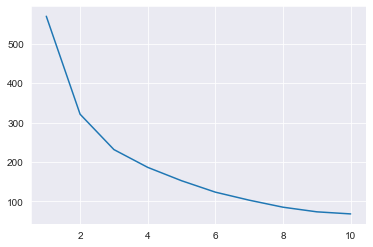

In [320]:
plt.plot(range(1,11), wss)

In [322]:
k_means = KMeans(n_clusters = 2)
k_means.fit(ipls)
labels = k_means.labels_

In [323]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [324]:
silhouette_score(ipls,labels)

0.40295333189606475

In [328]:
data4["Clus_kmeans2"] = labels
data4.head()

Name   Runs    Ave      SR  Fours  Sixes   HF  Clus_kmeans4  \
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0             1   
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0             1   
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0             1   
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0             1   
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0             1   

   Clus_kmeans2  
1             1  
3             1  
5             1  
7             1  
9             1

In [329]:
data4.Clus_kmeans2.value_counts().sort_index()

0    55
1    35
Name: Clus_kmeans2, dtype: int64

In [661]:
clust_profile=data4.drop(['Name'],axis=1)

clust_profile=clust_profile.groupby('Clus_kmeans2').mean()

clust_profile['freq']=data4.Clus_kmeans2.value_counts().sort_index()

clust_profile



Runs        Ave          SR      Fours      Sixes  \
Clus_kmeans2                                                            
0             122.745455  17.582000  110.481455  10.309091   3.636364   
1             372.657143  35.962286  132.808286  34.685714  13.771429   

                    HF  Clus_kmeans4  freq  
Clus_kmeans2                                
0             0.218182             0    55  
1             2.714286             1    35

After groupting the data using Kmeans with 2, we can see how easily we can rank these players. We can obseve that we can now differentiate between Top player and an avarage player with the help of clustering which can be further used to classify and rank players accordingly.

Hence, in the above data we can see how 1 shows the Highest Avg and is gives a rational approach where a batsman with high Avg has scored more no. of Half Centuies while the player with highest SR also scores fours and sixes is relatable. 

# ============================================================

##  <b> <font color = red> Part 5

Questions:


- 1.List down all possible dimensionality reduction techniques that can be implemented using python.
- 2.So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data and text data ? 


    - Please illustrate your findings using a simple implementation on python.

<b><font color = Green> 
    Ans 1: 
</font> </b>


The number of input variables or features for a dataset is referred to as its dimensionality. Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset. 
####                         Techniques for Dimensionality Reduction

- 1. Feature Selection Methods
- 2. Matrix Factorization
- 3. Manifold Learning
- 4. Autoencoder Method
    

<b><font color = Green> 
    Ans 2: 
</font> </b>    
    <font color = teal> Dimensionality reduction is used to reduce the dimension of the variables of a larger dataset that is compressed to the smaller one which contains most of the information to build a model. However, when you are working towards reducing the number of variables in the dataset we need to compromise our model accuracy.JHowever, using PCA will give good accuracy.</font>
    
    
The idea of PCA is to reduce the variables in the dataset and preserve data as much as possible.

- The image is a combination of pixels in rows placed one after another to form one single image each pixel value represents the intensity value of the image, so if you have multiple images we can form a matrix considering a row of pixels as a vector. It requires huge amounts of storage while working with many images where we are using PCA is used to compress it and preserve the data as much as possible.

#### Example using Python 

img = mplib.imread('/content/abcd.png')

print(img.shape)

plt.imshow(img)

In [673]:
#Reshaping the image to 2-dimensional

In [675]:
#img_r = np.reshape(img, (225, 582))

#pca = PCA(32).fit(img_r) 

#img_transformed = pca.transform(img_r) 

print(img_transformed.shape)

print(np.sum(pca.explained_variance_ratio_) )


Retrieving the results of the image after Dimension reduction.

temp = pca.inverse_transform(img_transformed) 

print(temp.shape)

temp = np.reshape(temp, (225,225 ,3))

print(temp.shape) 

plt.imshow(temp)

#### The output image, will be compressed using PCA.

After which we will test the  compressed data on the k-means algorithm.

# ==========================================================